In [1]:
import os
import IPython.display as display
from bson import ObjectId
from gridfs import GridFS
from pymongo import MongoClient
from ajna_commons.flask.conf import DATABASE, MONGODB_URI
from ajna_commons.utils.images import get_imagens_recortadas

2019-03-14 19:39:44,075 ajna         INFO     Configuração de log efetuada


Fazendo log de erros e alertas no arquivo  /home/ivan/pybr/ajna/padma/ajna_commons/flask/error.log
Fazendo log de atividade no arquivo  /home/ivan/pybr/ajna/padma/ajna_commons/flask/access.log


In [2]:
TEMNCM = {'metadata.contentType': 'image/jpeg',
          'metadata.carga.ncm': {'$exists': True}}
def get_cursor_filtrado(db, filtro, limit=None):
    cursor = db['fs.files'].find(filtro)
    if limit:
        cursor.limit(limit)
    return cursor
db = MongoClient(host=MONGODB_URI)[DATABASE]
cursor = get_cursor_filtrado(db, filtro=TEMNCM, limit=10)

In [3]:
grid_fs = next(cursor)
fs = GridFS(db)
_id = ObjectId(grid_fs['_id'])
if fs.exists(_id):
    grid_out = fs.get(_id)
    image = grid_out.read()
    
imgs = get_imagens_recortadas(db, _id)
print(imgs)

[<PIL.Image.Image image mode=RGB size=236x131 at 0x7F679AFFA6A0>]


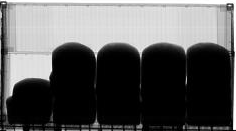

In [4]:
pil_image = imgs[0]
display.display(pil_image)

In [24]:
from datetime import timedelta
file_cursor = db['fs.files'].find(
        {'metadata.xml': None,
         'metadata.contentType': 'image/jpeg'
         })

In [25]:
for linha in file_cursor:
    numero = linha.get('metadata').get('numeroinformado')
    data = linha.get('uploadDate')
    data2 = linha.get('uploadDate')
    filename = linha.get('filename')
    print(numero, data, filename + '*')
    if numero and data:
        data_upload_antes = data - timedelta(hours=1)
        data_upload_depois = data + timedelta(hours=1)
        xml_document = db['fs.files'].find_one(
            {'metadata.numeroinformado': numero,
              'uploadDate': {'$gt': data_upload_antes,
                            '$lt': data_upload_depois},
             'metadata.contentType': 'text/xml'
             })
        if xml_document:
            print(xml_document['uploadDate'],
                  xml_document['metadata']['numeroinformado'],
                  xml_document['filename'],)

PONU7846228 2019-01-31 14:48:50.036000 20170714002631001BS_stamp.jpg*
2019-01-31 14:48:50.045000 PONU7846228 20170714002631001B.xml
GLDU7081957 2019-01-31 14:48:48.171000 20170714002631004PS_stamp.jpg*
2019-01-31 14:48:48.188000 GLDU7081957 20170714002631004P.xml
TCNU3506960 2019-01-31 14:53:28.290000 20170714002631005JS_stamp.jpg*
2019-01-31 14:53:28.309000 TCNU3506960 20170714002631005J.xml
HLXU1250789 2019-01-31 14:52:58.612000 201707150026310005S_stamp.jpg*
2019-01-31 14:52:58.650000 HLXU1250789 201707150026310005.xml
EMCU1289770 2019-01-31 14:49:45.210000 20170722002631000AS_stamp.jpg*
2019-01-31 14:49:45.219000 EMCU1289770 20170722002631000A.xml
TCNU4366143 2019-01-31 14:49:39.846000 201707220026310018S_stamp.jpg*
2019-01-31 14:49:39.855000 TCNU4366143 201707220026310018.xml
EMCU9771006 2019-01-31 14:49:47.043000 20170722002631001CS_stamp.jpg*
2019-01-31 14:49:47.052000 EMCU9771006 20170722002631001C.xml
MEDU8108587 2019-01-31 14:49:42.722000 201707220026310022S_stamp.jpg*
2019-0

In [29]:
filename = '20170714002631001BS_stamp.jpg'
if filename[:5] == 'XRAY-':
    posi = filename.find('--Array')
    xml_filename = filename[5:posi]
else:
    posi = filename.find('_icon')
    if posi != -1:
        xml_filename = filename[:posi]
    else:
        xml_filename = filename[:-11]
final_filename = xml_filename + '.xml'

In [30]:
final_filename

'20170714002631001B.xml'

In [31]:
xml_document = db['fs.files'].find_one({'filename': final_filename})

In [32]:
xml_document

{'_id': ObjectId('5c530ad21004b377f3dbf3b3'),
 'chunkSize': 261120,
 'filename': '20170714002631001B.xml',
 'length': 26422,
 'md5': '662d802214dca29536068e4f29d0cb49',
 'metadata': {'UNIDADE': 'ALFSTS:',
  'contentType': 'text/xml',
  'criacaoarquivo': datetime.datetime(2017, 1, 1, 2, 0),
  'dataescaneamento': datetime.datetime(2017, 7, 14, 12, 25, 47, 137000),
  'id': 'ALFSTS:5006',
  'idcov': '5006',
  'imagem': '2017\\07\\14\\PONU7846228/20170714002631001BS_stamp.jpg',
  'modificacaoarquivo': datetime.datetime(2017, 1, 1, 2, 0),
  'numeroinformado': 'PONU7846228',
  'recinto': 'MARIMEX',
  'recintoid': '2',
  'truckid': '20170714002631001B'},
 'uploadDate': datetime.datetime(2019, 1, 31, 14, 48, 50, 45000)}